In [1]:
#initialize packges
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install matplotlib

import numpy as np
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
test_df = pd.read_csv("titanicdb.csv")
train_df = pd.read_csv("titanicdb.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_passageiro             891 non-null    int64  
 1   sobrevivente              891 non-null    object 
 2   classe_da_passagem        891 non-null    int64  
 3   nome_passageiro           891 non-null    object 
 4   sexo                      891 non-null    object 
 5   idade                     714 non-null    float64
 6   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 7   pais_filhos_a_bordo       891 non-null    int64  
 8   numero_passagem           891 non-null    object 
 9   valor_passagem            891 non-null    object 
 10  id_cabine                 204 non-null    object 
 11  local_de_embarque         889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,id_passageiro,classe_da_passagem,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.836071,14.526497,1.102743,0.806057
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000


In [6]:
train_df.head(8)

,id_passageiro,sobrevivente,classe_da_passagem,nome_passageiro,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,numero_passagem,valor_passagem,id_cabine,local_de_embarque
0,1,nao,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,nao,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,nao,3,"Moran, Mr. James",male,NaN,0,0,330877,84.583,NaN,Q
6,7,nao,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,518.625,E46,S
7,8,nao,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S


In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
id_cabine,687,77.1
idade,177,19.9
local_de_embarque,2,0.2
id_passageiro,0,0.0
sobrevivente,0,0.0


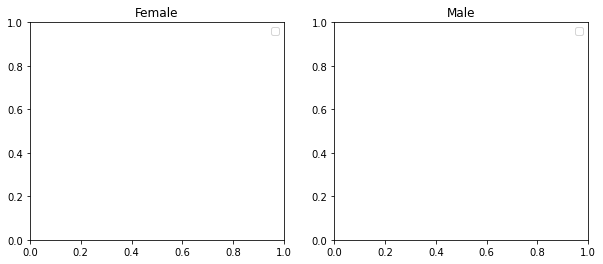

In [19]:
survived = 'sobrevivente'
not_survived = 'not sobrevivente'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['sexo']=='female']
men = train_df[train_df['sexo']=='male']
ax = sns.histplot(women[women['sobrevivente']==1].idade.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['sobrevivente']==0].idade.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend('Female')
ax.set_title('Female')
ax = sns.histplot(men[men['sobrevivente']==1].idade.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['sobrevivente']==0].idade.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend('Male')
_ = ax.set_title('Male')

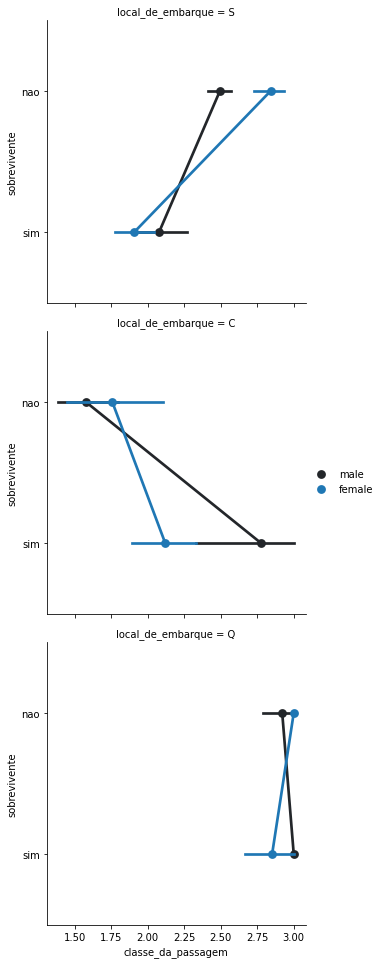

In [20]:
FacetGrid = sns.FacetGrid(train_df, row='local_de_embarque', height=4.5, aspect=1)
FacetGrid.map(sns.pointplot, 'classe_da_passagem', 'sobrevivente', 'sexo', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [21]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
id_cabine,687,77.1
idade,177,19.9
local_de_embarque,2,0.2
id_passageiro,0,0.0
sobrevivente,0,0.0


<AxesSubplot:xlabel='classe_da_passagem', ylabel='sobrevivente'>

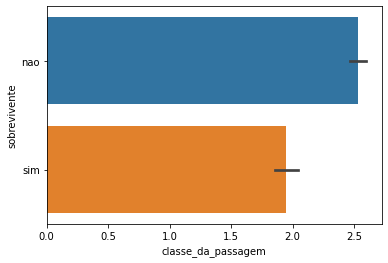

In [22]:
sns.barplot(x='classe_da_passagem', y='sobrevivente', data=train_df)